In [4]:
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import geopandas
import matplotlib.pyplot as plt
from descartes import PolygonPatch

%matplotlib inline

In [5]:
counties_csv = Path("../data/cleandata/median_yearly_income.csv")
counties_df = pd.read_csv(
    counties_csv,
    index_col = "zipcode"
)
counties_df.head()

,County,State,2020_Year_Wage,2019_Year_Wage,2018_Year_Wage,latitude,longitude
zipcode,,,,,,,
90001,Los_Angeles_County,CA,68068,61932,59892,33.97,118.24
94101,San_Francisco_County,CA,149604,119880,109332,37.77,-122.41
93001,Ventura_County,CA,60788,53400,50976,34.33,-119.31
80528,Larimer_County,CO,55588,49776,47832,40.55,-105.06
30369,Fulton_County,GA,96252,72660,45276,33.80,-84.47


In [6]:
counties_gdf = geopandas.GeoDataFrame(
    counties_df, geometry = geopandas.points_from_xy(counties_df.longitude, counties_df.latitude)
)

In [7]:
print(counties_gdf.head())

                       County State  2020_Year_Wage  2019_Year_Wage  \
zipcode                                                               
90001      Los_Angeles_County    CA           68068           61932   
94101    San_Francisco_County    CA          149604          119880   
93001          Ventura_County    CA           60788           53400   
80528          Larimer_County    CO           55588           49776   
30369           Fulton_County    GA           96252           72660   

         2018_Year_Wage  latitude  longitude                     geometry  
zipcode                                                                    
90001             59892     33.97     118.24   POINT (118.24000 33.97000)  
94101            109332     37.77    -122.41  POINT (-122.41000 37.77000)  
93001             50976     34.33    -119.31  POINT (-119.31000 34.33000)  
80528             47832     40.55    -105.06  POINT (-105.06000 40.55000)  
30369             45276     33.80     -84.47  

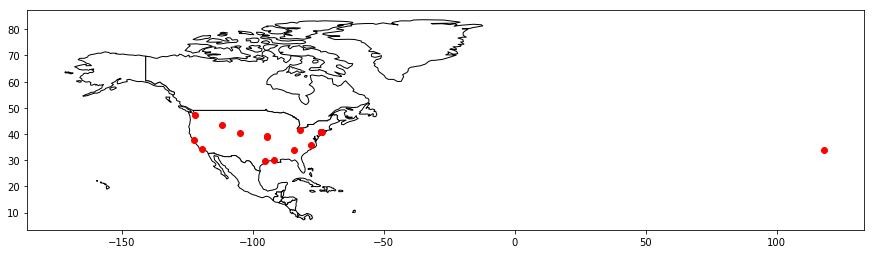

In [10]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    figsize=(15,10), color = 'white', edgecolor = 'black'
)

counties_gdf.plot(ax=ax, color = 'red')

plt.show()